Group Name: AG 40.

Student Name (Student ID):

1. TANAMATE FOO YONG QIN (A0237342J)

2. SURESH KUMAR SARAD (A0097808M)

3. LI TIANSHENG (A0243714J)

# Question 1

Consider the maze shown below. The Maze has 16 rows and 24 columns The objective is to find a shortest path from cell $S$ to cell $G$.


![Maze](Maze_Assignment_1.jpg)


The agent can take four actions in each cell: 'RIGHT', 'DOWN', 'UP', 'LEFT'.  

Each cell is represented as $(x,y)$, where $x$ indicates row number and $y$ indicates column number. Action 'UP' takes the agent from cell $(x,y)$ to $(x+1,y)$. Action 'DOWN' takes the agent from cell $(x,y)$ to $(x-1,y)$. Action 'RIGHT' takes the agent from cell $(x,y)$ to $(x,y+1)$. Action 'LEFT' takes the agent from cell $(x,y)$ to $(x,y-1)$. The triplet $(s,a,s')$  indicates that taking action $a$ at state $s$ leads to state $s'$. Actions 'LEFT' or 'RIGHT' cost 10 units for all $(s,a,s')$. Actions 'UP' or 'DOWN' cost 1 unit for all  $(s,a,s')$.  The agent cannot move into cells that are shaded. Assume that the agent knows the boundaries of the maze and has full observability. Consequently, at the bottom (row 0) and top (row 15), the agent will not take actions 'DOWN' and 'UP', respectively; at left (column 0) and right (column 23) columns, the agent will not take 'LEFT' and 'RIGHT' actions, respectively. Similalry, the agent will not take actions that lead to shaded region in the maze.

## **Q1.a: Class Maze(Problem)** [3 Marks]

Write a Maze class to create a model for this problem. You should not use an explicit state space model. The modelling should inherit the abstract class 'Problem' (given below). With the problem formulation, find the shortest path from S to G cell. Propose and implement multiple heuristics (at least two heuristics) for informed search algorithms. 

### Blocked Rows and Columns:
[(14,9), (13,10), (12,10), (11,10), (10,10), (10,9), (9,9), (8,9), (7,9), (6,9), (11,12), (10,12), (11,13), (10,13)]

### Goal Loc:
(11,9)

### Init Loc:
(8,10)

### *All tuple written (row, col)

## **Q1.b: Analysis of the Algorithms** [7 Marks]

1. Solve the above Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search 

    f. Greedy Best-first Search

    g. Any other variants for search algorithms that are not discussed in the class (bonus/optional question) 

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms. 
 
3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.
 
4. Draw a bar plot comparing the statistics of the algorithms and explain the results. 

Note 1: You must follow the problem formulation discussed in the class. A abstract class for Problem amd Node definition is presented below. The search tree generation should follow the template discussed in the class (i.e., Node class, expand methods, etc.). 

Note 2: If you are borrowing a block of code (for example, helper functions or data structures, etc.) from AIMA4e repository, you have to acknowledge it in the code. 

Note 3: The code should be written in a single jupyter notebook file.

In [30]:

class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [31]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 


At the start of the report, we would like to acknowledge the code repository from AIMA, which was referenced and modified for the codes in this section and the helper function, with credits to their authors.

# REPORT- Q1A:
We have defined the Maze class with 4 methods:
- The first, called "add_blocker", takes in a series of blockers, and adds it to a dictionary with the key as the role, and the values as a the column value(s) of the blocker.

- The second, "print_blockers", lets us print the blockers.

- The third, called "actions_at_state", takes in a state, and returns all available actions at that state (up, down, left, right). We do not check for blockers or edges in this method. Instead, we will check for this in the last method called "actions". 

- Lastly, we have a method called "actions", that takes in an action and state, and returns the State in the form of (row,column), and also the Action cost of going to that state. We check if the next state is about to exceed the edges of the map- or hit a blocker, if so, we do not go to a new state, but stay on the current state.

- We initialise the Maze Class with the number of rows and columns in the maze, the initial state and the goal state. Since this inherits the pre-defined Problem class, we are also able to do a goal-check.



In [32]:
from pprint import pprint
from collections import defaultdict

class Maze(Problem):
    #Your code goes here
    def __init__(self, rows, columns, initial=None, goal=None, **kwds):
        super().__init__(initial, goal, **kwds)
        self.cols = columns
        self.rows = rows
        self.blockers = defaultdict(list)
        
    def add_blocker(self,blocker):
        r,c = blocker
        self.blockers[r].append(c)
        
    def print_blockers(self):
        pprint(self.blockers)
        
    def actions_at_state(self, state):
        return ['up', 'right', 'down', 'left']
    
    def actions(self, action, state): 
        r,c = state
        cost = 0
        if action == 'up':
            r += 1
            cost = 1
        if action == 'down':
            r -= 1
            cost = 1
        if action == 'left':
            c -= 1
            cost = 10
        if action == 'right':
            c += 1
            cost = 10
        if(r < 0 or c < 0 or r > self.rows or c > self.cols ):
            return {'state': state, 'cost': 0}
        if(c in self.blockers[r]):
            return {'state': state, 'cost': 0}
        return {'state':(r,c), 'cost': cost}
    

In [33]:
from pprint import pprint
maze = Maze(15,23, (8,10),(11,9))
blocker = [(14,9), (13,10), (12,10), (11,10), (10,10), (10,9), (9,9), (8,9), (7,9), (6,9), (11,12), (10,12), (11,13), (10,13)]

for b in blocker:
    maze.add_blocker(b)
    
    
pprint(maze.actions('right', (5,10)))

{'cost': 10, 'state': (5, 11)}


# REPORT- Q1B (BFS):

We start inferencing with BFS.

Results:
- We reached the Goal Node of (11,9), with a Path Cost of 39 
- The maximum number of frontier items we have is 30 
- We created 198 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]




In [44]:
### BFS
from collections import deque

def bfs(maze):
    visited_nodes = defaultdict(list)
    current_state = maze.initial
    visited_nodes[current_state[0]].append(current_state[1])

    frontier_node = Node(current_state)
    count_node = 1

    q = deque([frontier_node])
    frontier_count = len(q)
    max_frontier = 1


    while(len(q) != 0):
        expand_node = q.popleft()
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state'] or (c in visited_nodes[r])): 
                continue
            frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
            count_node += 1
            visited_nodes[r].append(c)
            q.append(frontier_node)
            
            if(maze.is_goal(frontier_node.state)):
                print('BFS: Goal reached!')
                pprint({'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node})
                return {'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
            

        frontier_count = len(q)
        max_frontier = max(max_frontier, frontier_count)
    #Goal not found    
    return False


solution = bfs(maze)

trace_node = solution['goal_node']
max_frontier = solution['max_frontier']
count_node = solution['count_node']
total_cost = trace_node.path_cost

path = [trace_node]

while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

BFS: Goal reached!
{'count_node': 201, 'goal_node': <(11, 9)>, 'max_frontier': 31}


Total cost:
39 

Maximum number of frontiers:
31 

Number of nodes created:
201 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# REPORT- Q1B (DFS with cycle check):

Results:
-We reached the Goal Node of (11,9), with a Path Cost of 2913 
- The maximum number of frontier items we have is 306  
- We created 640 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(5, 7)>, <(5, 6)>, <(5, 5)>, <(5, 4)>, <(5, 3)>, <(5, 2)>, <(5, 1)>, <(5, 0)>, <(4, 0)>, <(3, 0)>, <(2, 0)>, <(1, 0)>, <(0, 0)>, <(0, 1)>, <(0, 2)>, <(0, 3)>, <(0, 4)>, <(0, 5)>, <(0, 6)>, <(0, 7)>, <(0, 8)>, <(0, 9)>, <(0, 10)>, <(0, 11)>, <(0, 12)>, <(0, 13)>, <(0, 14)>, <(0, 15)>, <(0, 16)>, <(0, 17)>, <(0, 18)>, <(0, 19)>, <(0, 20)>, <(0, 21)>, <(0, 22)>, <(0, 23)>, <(1, 23)>, <(1, 22)>, <(1, 21)>, <(1, 20)>, <(1, 19)>, <(1, 18)>, <(1, 17)>, <(1, 16)>, <(1, 15)>, <(1, 14)>, <(1, 13)>, <(1, 12)>, <(1, 11)>, <(1, 10)>, <(1, 9)>, <(1, 8)>, <(1, 7)>, <(1, 6)>, <(1, 5)>, <(1, 4)>, <(1, 3)>, <(1, 2)>, <(1, 1)>, <(2, 1)>, <(2, 2)>, <(2, 3)>, <(2, 4)>, <(2, 5)>, <(2, 6)>, <(2, 7)>, <(2, 8)>, <(2, 9)>, <(2, 10)>, <(2, 11)>, <(2, 12)>, <(2, 13)>, <(2, 14)>, <(2, 15)>, <(2, 16)>, <(2, 17)>, <(2, 18)>, <(2, 19)>, <(2, 20)>, <(2, 21)>, <(2, 22)>, <(2, 23)>, <(3, 23)>, <(3, 22)>, <(3, 21)>, <(3, 20)>, <(3, 19)>, <(3, 18)>, <(3, 17)>, <(3, 16)>, <(3, 15)>, <(3, 14)>, <(3, 13)>, <(3, 12)>, <(3, 11)>, <(3, 10)>, <(3, 9)>, <(3, 8)>, <(3, 7)>, <(3, 6)>, <(3, 5)>, <(3, 4)>, <(3, 3)>, <(3, 2)>, <(3, 1)>, <(4, 1)>, <(4, 2)>, <(4, 3)>, <(4, 4)>, <(4, 5)>, <(4, 6)>, <(4, 7)>, <(4, 8)>, <(4, 9)>, <(4, 10)>, <(4, 11)>, <(4, 12)>, <(4, 13)>, <(4, 14)>, <(4, 15)>, <(4, 16)>, <(4, 17)>, <(4, 18)>, <(4, 19)>, <(4, 20)>, <(4, 21)>, <(4, 22)>, <(4, 23)>, <(5, 23)>, <(5, 22)>, <(5, 21)>, <(5, 20)>, <(5, 19)>, <(5, 18)>, <(5, 17)>, <(5, 16)>, <(5, 15)>, <(5, 14)>, <(5, 13)>, <(5, 12)>, <(5, 11)>, <(6, 11)>, <(6, 12)>, <(6, 13)>, <(6, 14)>, <(6, 15)>, <(6, 16)>, <(6, 17)>, <(6, 18)>, <(6, 19)>, <(6, 20)>, <(6, 21)>, <(6, 22)>, <(6, 23)>, <(7, 23)>, <(7, 22)>, <(7, 21)>, <(7, 20)>, <(7, 19)>, <(7, 18)>, <(7, 17)>, <(7, 16)>, <(7, 15)>, <(7, 14)>, <(7, 13)>, <(7, 12)>, <(7, 11)>, <(8, 11)>, <(8, 10)>, <(9, 10)>, <(9, 11)>, <(9, 12)>, <(8, 12)>, <(8, 13)>, <(8, 14)>, <(8, 15)>, <(8, 16)>, <(8, 17)>, <(8, 18)>, <(8, 19)>, <(8, 20)>, <(8, 21)>, <(8, 22)>, <(8, 23)>, <(9, 23)>, <(9, 22)>, <(9, 21)>, <(9, 20)>, <(9, 19)>, <(9, 18)>, <(9, 17)>, <(9, 16)>, <(9, 15)>, <(9, 14)>, <(10, 14)>, <(10, 15)>, <(10, 16)>, <(10, 17)>, <(10, 18)>, <(10, 19)>, <(10, 20)>, <(10, 21)>, <(10, 22)>, <(10, 23)>, <(11, 23)>, <(11, 22)>, <(11, 21)>, <(11, 20)>, <(11, 19)>, <(11, 18)>, <(11, 17)>, <(11, 16)>, <(11, 15)>, <(11, 14)>, <(12, 14)>, <(12, 13)>, <(12, 12)>, <(12, 11)>, <(13, 11)>, <(13, 12)>, <(13, 13)>, <(13, 14)>, <(13, 15)>, <(12, 15)>, <(12, 16)>, <(12, 17)>, <(12, 18)>, <(12, 19)>, <(12, 20)>, <(12, 21)>, <(12, 22)>, <(12, 23)>, <(13, 23)>, <(13, 22)>, <(13, 21)>, <(13, 20)>, <(13, 19)>, <(13, 18)>, <(13, 17)>, <(13, 16)>, <(14, 16)>, <(14, 15)>, <(14, 14)>, <(14, 13)>, <(14, 12)>, <(14, 11)>, <(14, 10)>, <(15, 10)>, <(15, 9)>, <(15, 8)>, <(15, 7)>, <(15, 6)>, <(15, 5)>, <(15, 4)>, <(15, 3)>, <(15, 2)>, <(15, 1)>, <(15, 0)>, <(14, 0)>, <(13, 0)>, <(12, 0)>, <(11, 0)>, <(10, 0)>, <(9, 0)>, <(8, 0)>, <(7, 0)>, <(6, 0)>, <(6, 1)>, <(6, 2)>, <(6, 3)>, <(6, 4)>, <(6, 5)>, <(6, 6)>, <(6, 7)>, <(6, 8)>, <(7, 8)>, <(7, 7)>, <(7, 6)>, <(7, 5)>, <(7, 4)>, <(7, 3)>, <(7, 2)>, <(7, 1)>, <(8, 1)>, <(8, 2)>, <(8, 3)>, <(8, 4)>, <(8, 5)>, <(8, 6)>, <(8, 7)>, <(8, 8)>, <(9, 8)>, <(9, 7)>, <(9, 6)>, <(9, 5)>, <(9, 4)>, <(9, 3)>, <(9, 2)>, <(9, 1)>, <(10, 1)>, <(10, 2)>, <(10, 3)>, <(10, 4)>, <(10, 5)>, <(10, 6)>, <(10, 7)>, <(10, 8)>, <(11, 8)>, <(11, 7)>, <(11, 6)>, <(11, 5)>, <(11, 4)>, <(11, 3)>, <(11, 2)>, <(11, 1)>, <(12, 1)>, <(12, 2)>, <(12, 3)>, <(12, 4)>, <(12, 5)>, <(12, 6)>, <(12, 7)>, <(12, 8)>, <(12, 9)>, <(11, 9)>]


In [35]:
### DFS

def is_cycle(expand_node, coord):
    curr = Node(None, expand_node)
    while(curr):
        if(curr.state == coord):
            return True
        curr = curr.parent
    return False
    

def dfs(maze):
    current_state = maze.initial

    frontier_node = Node(current_state)
    
    stack = [frontier_node]
    frontier_count = len(stack)
    max_frontier = 1
    count_node = 1
    
    if maze.is_goal(frontier_node.state): 
        print('DFS: Goal reached!')
        return {'frontier_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
   
    while(len(stack)!= 0):
        expand_node = stack.pop()
        #print('expand', expand_node)
        #print(stack[:-3])
        if maze.is_goal(frontier_node.state):
            print('DFS: Goal reached!')
            return {'goal_node': frontier_node, 'max_frontier': max_frontier, 'count_node': count_node}
        
        dirs = ''

        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if (not is_cycle(expand_node, (r,c)) and expand_node.state != s['state']):
                dirs = action
                count_node += 1
                frontier_count = len(stack)
                max_frontier = max(max_frontier, frontier_count)
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
                stack.append(frontier_node)
        
    return False


solution = dfs(maze)

print(solution)
trace_node = solution['goal_node']
max_frontier = solution['max_frontier']
count_node = solution['count_node']
total_cost = trace_node.path_cost

path = [trace_node]

while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

DFS: Goal reached!
{'goal_node': <(11, 9)>, 'max_frontier': 306, 'count_node': 640}


Total cost:
2913 

Maximum number of frontiers:
306 

Number of nodes created:
640 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(5, 7)>, <(5, 6)>, <(5, 5)>, <(5, 4)>, <(5, 3)>, <(5, 2)>, <(5, 1)>, <(5, 0)>, <(4, 0)>, <(3, 0)>, <(2, 0)>, <(1, 0)>, <(0, 0)>, <(0, 1)>, <(0, 2)>, <(0, 3)>, <(0, 4)>, <(0, 5)>, <(0, 6)>, <(0, 7)>, <(0, 8)>, <(0, 9)>, <(0, 10)>, <(0, 11)>, <(0, 12)>, <(0, 13)>, <(0, 14)>, <(0, 15)>, <(0, 16)>, <(0, 17)>, <(0, 18)>, <(0, 19)>, <(0, 20)>, <(0, 21)>, <(0, 22)>, <(0, 23)>, <(1, 23)>, <(1, 22)>, <(1, 21)>, <(1, 20)>, <(1, 19)>, <(1, 18)>, <(1, 17)>, <(1, 16)>, <(1, 15)>, <(1, 14)>, <(1, 13)>, <(1, 12)>, <(1, 11)>, <(1, 10)>, <(1, 9)>, <(1, 8)>, <(1, 7)>, <(1, 6)>, <(1, 5)>, <(1, 4)>, <(1, 3)>, <(1, 2)>, <(1, 1)>, <(2, 1)>, <(2, 2)>, <(2, 3)>, <(2, 4)>, <(2, 5)>, <(2, 6)>, <(2, 7)>, <(2, 8)>, <(2, 9)>, <(2, 10)>, <(2, 11)>, <(2, 12)>, <(2, 13)>, <

# REPORT- Q1B (IDS with cycle check):

Results:
- We reached the Goal Node at l=11, with a Path Cost of 39  
- At l=11, the maximum number of frontier items we have is 23   
- We created 101122 nodes across IDS.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

In [45]:
### IDS with Cycle Check

## DLS
def dls(maze,l, count_node):

    current_state = maze.initial    
    frontier_node = Node(current_state)
    
    q = deque([frontier_node])

    frontier_count = len(q)
    max_frontier = 1


    while(len(q) != 0 ):
        
        expand_node = q.pop()
        
        if(maze.is_goal(expand_node.state)):
            print('IDS: Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}, count_node

        else:

            if len(expand_node)>l:
                continue
            
            for action in maze.actions_at_state(expand_node):
                s = maze.actions(action, expand_node.state)

                if(expand_node.state == s['state'] or is_cycle(expand_node, s['state'])): 
                    continue
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])
                count_node += 1 
                
                q.append(frontier_node)                

        frontier_count = len(q)        
        max_frontier = max(max_frontier, frontier_count)


    #Goal not found    
    return False, count_node

## IDS
def ids(maze, count_node):
    for i in range(0,99999):
        solution_dls, count_node =dls(maze,i, count_node)

        if solution_dls==False:
            print(f'Limit l={i}, no solution found. Continue with l={i+1}')
            
        else:
            print(f'Solution found with l={i}')
            return solution_dls
            
    
solution_ids=ids(maze, 1)

trace_node = solution_ids['goal_node']
max_frontier = solution_ids['max_frontier']
count_node = solution_ids['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers (at deepest depth reached):')
print(max_frontier, '\n')

print('Number of nodes created (in total from l=0 onwards):')
print(count_node, '\n')

print('Path taken')
print(path[::-1])


Limit l=0, no solution found. Continue with l=1
Limit l=1, no solution found. Continue with l=2
Limit l=2, no solution found. Continue with l=3
Limit l=3, no solution found. Continue with l=4
Limit l=4, no solution found. Continue with l=5
Limit l=5, no solution found. Continue with l=6
Limit l=6, no solution found. Continue with l=7
Limit l=7, no solution found. Continue with l=8
Limit l=8, no solution found. Continue with l=9
Limit l=9, no solution found. Continue with l=10
Limit l=10, no solution found. Continue with l=11
IDS: Goal reached!
{'count_node': 101122, 'goal_node': <(11, 9)>, 'max_frontier': 23}
Solution found with l=11


Total cost:
39 

Maximum number of frontiers (at deepest depth reached):
23 

Number of nodes created (in total from l=0 onwards):
101122 

Path taken
[<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]


# REPORT- Q1B (Uniform Cost Search):

Results:
- We reached the Goal Node, with a Path Cost of 39  
- The maximum number of frontier items we have is 34   
- We created 127 nodes.
- The Path taken is [<(8, 10)>, <(7, 10)>, <(6, 10)>, <(5, 10)>, <(5, 9)>, <(5, 8)>, <(6, 8)>, <(7, 8)>, <(8, 8)>, <(9, 8)>, <(10, 8)>, <(11, 8)>, <(11, 9)>]

In [ ]:
### Uniform Cost Search

from queue import PriorityQueue


def ucs(maze):
    q = PriorityQueue()
    current_state = maze.initial

    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('UCS: Goal reached!!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                q.put((frontier_node.path_cost, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_ucs = ucs(maze)


trace_node = solution_ucs['goal_node']
max_frontier = solution_ucs['max_frontier']
count_node = solution_ucs['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])


# REPORT- Q1B (A* Search):


### Heuristics for Informed Search Algorithms:
- [to fill: note that the qn ask for 2 heuristics, and we need to compare the results of both and pick one?]



A* Search Results:



Greedy Search Results:



In [ ]:
### A* search

from queue import PriorityQueue

def a_star(maze):
    q = PriorityQueue()
    current_state = maze.initial

    goal_row = maze.goal[0]
    goal_col = maze.goal[1]
    
    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('A Star Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                heur = abs(r-goal_row) + abs(10*(c-goal_col))
                a_star_cost = heur + (frontier_node.path_cost)
                q.put((a_star_cost, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_astar = a_star(maze)


trace_node = solution_astar['goal_node']
max_frontier = solution_astar['max_frontier']
count_node = solution_astar['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

In [ ]:
from queue import PriorityQueue

def greedy_bfs(maze):
    q = PriorityQueue()
    current_state = maze.initial

    goal_row = maze.goal[0]
    goal_col = maze.goal[1]
    frontier_node = Node(current_state)
    
    #store visited notes in dictionary
    visited_nodes = defaultdict(tuple)

    visited_nodes[current_state] = frontier_node
    count_node = 1
    
    q.put((0, frontier_node))
    
    frontier_count = q.qsize()
    max_frontier = 1

    while(not q.empty()):
        current_cost, expand_node = q.get()
        
        
        if(maze.is_goal(expand_node.state) ):
            #print(q.queue)
            print('Greedy Goal reached!')
            pprint({'goal_node': expand_node, 'max_frontier': max_frontier})
            return {'goal_node': expand_node, 'max_frontier': max_frontier, 'count_node': count_node}
          
        
        for action in maze.actions_at_state(expand_node):
            s = maze.actions(action, expand_node.state)
            r = s['state'][0]
            c = s['state'][1]
            if(expand_node.state == s['state']): 
                continue

            visited_node = visited_nodes[(r,c)]
            
            if(not visited_node or visited_node.path_cost > expand_node.path_cost+s['cost']):
                frontier_node = Node(s['state'], expand_node, action, expand_node.path_cost+s['cost'])

                visited_nodes[r,c] = expand_node
                count_node += 1

                heur = abs(r-goal_row) + abs(10*(c-goal_col))
                a_star_cost = heur
                q.put((a_star_cost, frontier_node)) 
                              
        frontier_count = q.qsize()
        max_frontier = max(max_frontier, frontier_count)
        
    #Goal not found    
    return False


solution_greedy = greedy_bfs(maze)


trace_node = solution_greedy['goal_node']
max_frontier = solution_greedy['max_frontier']
count_node = solution_greedy['count_node']
total_cost = trace_node.path_cost

path = [trace_node]
    
while(trace_node.parent != None):
    trace_node = trace_node.parent
    path.append(trace_node)

print('\n')
print('Total cost:')
print(total_cost, '\n')
    
print('Maximum number of frontiers:')
print(max_frontier, '\n')

print('Number of nodes created:')
print(count_node, '\n')

print('Path taken')
print(path[::-1])

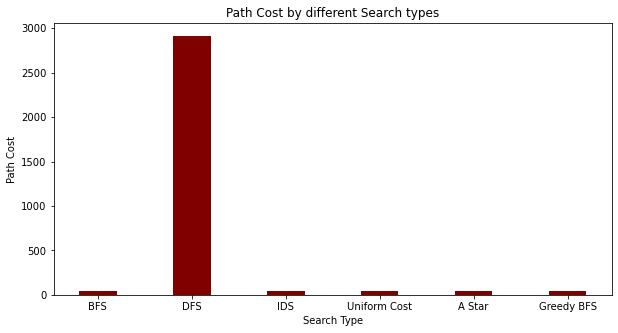

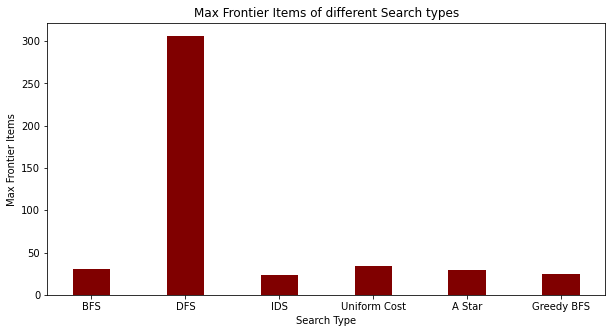

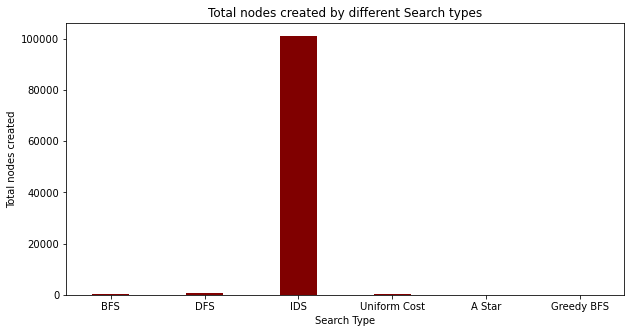

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'BFS':39, 'DFS':2913, 'IDS':39,
        'Uniform Cost':39, 'A Star':39 , 'Greedy BFS': 39 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Path Cost")
plt.title("Path Cost by different Search types")
plt.show()


# creating the dataset
data = {'BFS':31, 'DFS':306, 'IDS':23,
        'Uniform Cost':34, 'A Star': 29, 'Greedy BFS': 25 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Max Frontier Items")
plt.title("Max Frontier Items of different Search types")
plt.show()

# creating the dataset
data = {'BFS':201, 'DFS':640, 'IDS':101122,
        'Uniform Cost':127, 'A Star': 67, 'Greedy BFS': 46 }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Search Type")
plt.ylabel("Total nodes created")
plt.title("Total nodes created by different Search types")
plt.show()